
Datos_originales
x1 = [8.0, 4.0, 12.0, 3.0, 10.0]
x2 = [5.0, 2.0, 14.0, 6.0, 5.0]




Procedimiento por Distancia Manhattan

Matriz de distancia : 
[0.0, 7.0, 13.0, 6.0, 2.0]
[7.0, 0.0, 20.0, 5.0, 9.0]
[13.0, 20.0, 0.0, 17.0, 11.0]
[6.0, 5.0, 17.0, 0.0, 8.0]
[2.0, 9.0, 11.0, 8.0, 0.0]

El valor menor es: 2.000000 que se encuentra en la fila: 4 de la columna: 0

Iteracion: 1

Datos actualizados
[9.0, 4.0, 12.0, 3.0]
[5.0, 2.0, 14.0, 6.0]

Matriz de distancia : 
[0.0, 8.0, 12.0, 7.0]
[8.0, 0.0, 20.0, 5.0]
[12.0, 20.0, 0.0, 17.0]
[7.0, 5.0, 17.0, 0.0]

El valor menor es: 5.000000 que se encuentra en la fila: 3 de la columna: 1

Iteracion: 2

Datos actualizados
[9.0, 3.5, 12.0]
[5.0, 4.0, 14.0]

Matriz de distancia : 
[0.0, 6.5, 12.0]
[6.5, 0.0, 18.5]
[12.0, 18.5, 0.0]

El valor menor es: 6.500000 que se encuentra en la fila: 0 de la columna: 1

Iteracion: 3

Datos actualizados
[6.25, 12.0]
[4.5, 14.0]

Matriz de distancia : 
[0.0, 15.25]
[15.25, 0.0]

El valor menor es: 15.250000 que se 

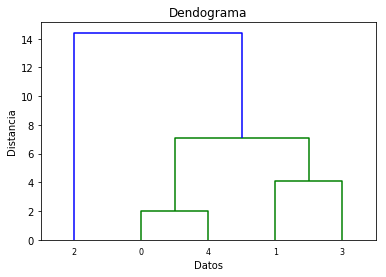

In [7]:
import pandas as pd #cargar datos
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar
datos = pd.read_csv("punto3.csv", header=None, skiprows=1, sep=';')
distancia = []


def guardar_datos():
  x1 = []
  x2 = []
  for i in range(len(datos[0])):
    x1.append(float(datos[0][i]))
  for i in range(len(datos[1])):
    x2.append(float(datos[1][i]))
  print("\nDatos_originales")
  print("x1 = " + str(x1))
  print("x2 = " + str(x2))
  return x1,x2
    
def calcular_distancia_m(x1,x2):
  m_distancia = []
  for i in range(len(x1)):
    m_distancia.append([])
    for j in range(len(x2)):
      m_distancia[i].append(abs(x1[j] - x1[i]) + abs(x2[j] -x2[i]))
  print("\nMatriz de distancia : ")
  for i in m_distancia:
      print(i)
  distancia = m_distancia
  return m_distancia

def calcular_distancia_e(x1,x2):
  m_distancia = []
  for i in range(len(x1)):
    m_distancia.append([])
    for j in range(len(x2)):
      m_distancia[i].append(m.sqrt((x1[j]- x1[i])**2+(x2[j]-x2[i])**2))
  print("\nMatriz de distancia: ")
  for i in m_distancia:
      print(i)
  distancia = m_distancia
  return m_distancia

def mayor(x):
  mayor=x[0][0]
  fila=0
  columna=0
  for i in range(0,len(x)):
    for j in range(0,i):
      if (x[i][j]>mayor):
        mayor=x[i][j]
        fila=i
        columna=j
  print("\nEl valor mayor es: %f que se encuentra en la fila: %d de la columna: %d" % (mayor,fila,columna))
  return fila,columna      

def menor(x):
  menor=x[0][0]
  con=0
  fila=0
  columna=0
  for i in range(0,len(x)):
    for j in range(0,i):
      if (x[i][j]<menor and x[i][j]!=0.0):
        menor=x[i][j]
        fila=i
        columna=j
      elif(menor==0):
        con=con+1
        menor=x[0][con]
        fila =0
        columna=con
  print("\nEl valor menor es: %f que se encuentra en la fila: %d de la columna: %d" % (menor,fila,columna))
  return fila,columna 

def cluster_m(x1,x2,itera):
  bandera=1
  distancia = calcular_distancia_m(x1,x2)
  fila , columna = menor(distancia)
  n_x1=[]
  n_x2=[]
  c1=(x1[fila]+x1[columna])/2  
  c2=(x2[fila]+x2[columna])/2
  for i in range(len(x1)):
    if((i == fila or i == columna)and bandera==1):
      n_x1.append(c1)
      n_x2.append(c2)
      bandera=0
    elif(i!=fila and i!=columna):
      n_x1.append(x1[i])
      n_x2.append(x2[i])
  
  if(len(distancia)!=2):
    print(("\nIteracion: %d")%itera)
    itera= itera +1
    print("\nDatos actualizados")    
    print(n_x1)
    print(n_x2)
    cluster_m(n_x1,n_x2,itera)

def cluster_e(x1,x2,itera):
  bandera=1
  distancia = calcular_distancia_e(x1,x2)
  fila , columna = menor(distancia)
  n_x1=[]
  n_x2=[]
  print("Valores de cluster")
  c1=(x1[fila]+x1[columna])/2  
  print(c1)
  c2=(x2[fila]+x2[columna])/2
  print(c2)
  for i in range(len(x1)):
    if((i == fila or i == columna)and bandera==1):
      n_x1.append(c1)
      n_x2.append(c2)
      bandera=0
    elif(i!=fila and i!=columna):
      n_x1.append(x1[i])
      n_x2.append(x2[i])
  
  if(len(distancia)!=2):
    print(("\nIteracion: %d")%itera)
    itera= itera +1
    print("\nDatos actualizados")    
    print(n_x1)
    print(n_x2)
    cluster_e(n_x1,n_x2,itera)
    
def graficar_dendograma():
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancia")#Distancia Euclideana
  plt.show()
  
def ejecutar():
  itera= 1
  x1, x2 = guardar_datos()
  print("\n\n\n\nProcedimiento por Distancia Manhattan")
  cluster_m(x1,x2,itera)
  print("\n\n\n\n\nProcedimiento por Distancia Euclideana")
  cluster_e(x1,x2,itera)
  graficar_dendograma()  
ejecutar()